<a href="https://colab.research.google.com/github/kezinas/ml2025/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Линейная регрессия#

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [ ]:
x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


In [ ]:
x.shape, y.shape

((20,), (20,))

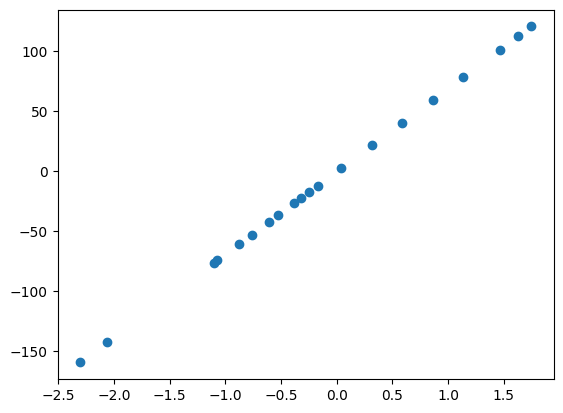

In [ ]:
plt.figure()
plt.scatter(x, y)

plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 1
        self.b1 = 1

    def predict(self, x):
      x = np.array(x).flatten()
      return self.b0 + self.b1 * x

    def error(self, x, y):
      x = np.array(x).flatten()
      y = np.array(y).flatten()
      return sum((self.predict(x) - y)**2) / (2 * len(y))

    def fit(self, x, y):
      x = np.array(x).flatten()
      y = np.array(y).flatten()
      alpha = 0.5
      prev_error = float('inf')
      epsilon = 1e-6
      for _ in range(100):
        old_b0, old_b1 = self.b0, self.b1
        #нужно сделать отдельные переменные, чтобы шаг спуска был одновременно по b0 и b1
        dJ0 = sum(self.predict(x) - y) /len(x)
        dJ1 = sum((self.predict(x) - y) * x) /len(x)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
        current_error = self.error(x, y)
        if current_error > prev_error:
            self.b0, self.b1 = old_b0, old_b1
            alpha /= 2
            continue
        if abs(prev_error - current_error) < epsilon:
                break
        prev_error = current_error
    def plot(self, x, y):
      plt.scatter(x, y, color='b', label='Данные')

      x_line = np.linspace(min(x), max(x), 2)
      y_line = self.predict(x_line)
      plt.plot(x_line, y_line, 'r-', label='Прогноз')

      plt.legend()
      plt.show()

градиентный спуск расходится при скорости

In [ ]:
model = Model()
print("initial error:", model.error(x, y))

initial error: 2862.9340147066887


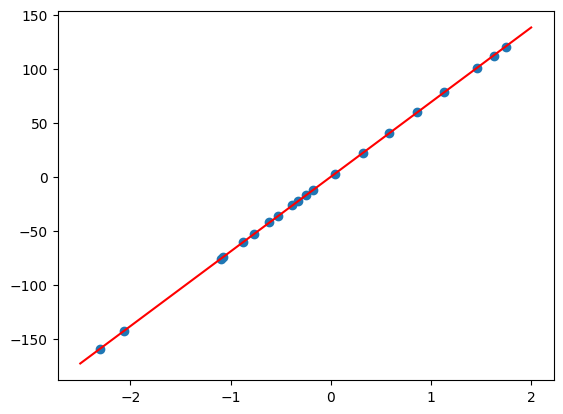

In [ ]:
plt.figure()
plt.scatter(x, y)

x_pred = np.linspace(-2.5, 2, 100)
y_pred = model.predict(x_pred)
plt.plot(x_pred, y_pred, 'r')

plt.show()

In [ ]:
model.fit(x, y)
print("final error:", model.error(x, y))

final error: 1.5940342189855508e-07


#Множественная регрессия#

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

In [ ]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [ ]:
x[0].shape, y.shape

((387,), (387, 1))

In [ ]:
binary0 = LinearRegression()

In [ ]:
binary0.fit(x[[0]], y)

LinearRegression()

In [ ]:
binary0.coef_

array([[22.78111342]])

In [ ]:
binary0.intercept_

array([-4.05666473])

In [ ]:
y_pred = binary0.predict(x[[0]])

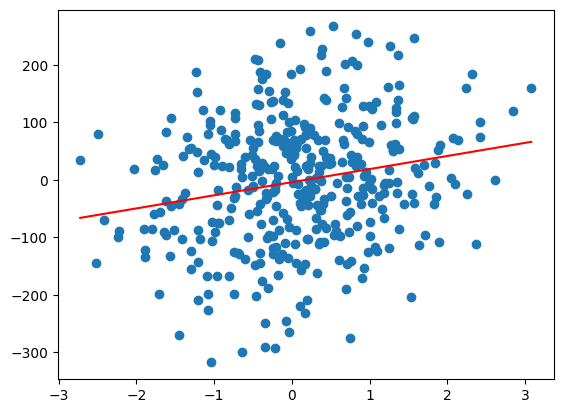

In [ ]:
plt.scatter(x[0], y)
xx = np.linspace(x[0].min(), x[0].max(), 100).reshape((-1, 1))
plt.plot(xx, binary0.predict(xx), c='r')

In [ ]:
binary0.score(x[[0]], y)

0.04364336234689348

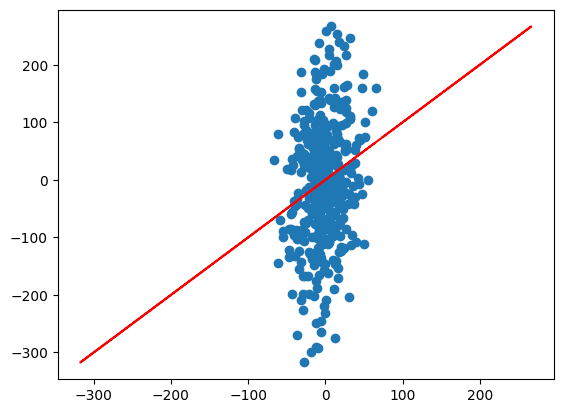

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

In [ ]:
binary1 = LinearRegression().fit(x[[1]], y)

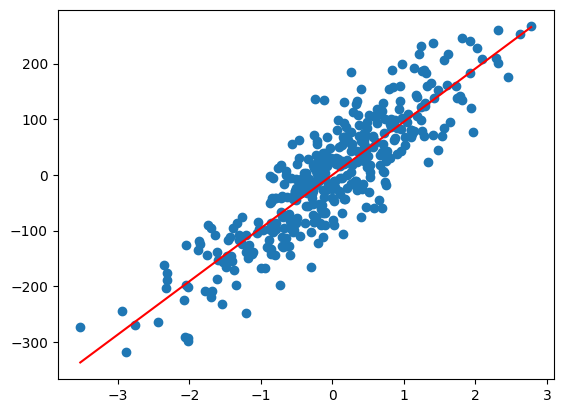

In [ ]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary1.predict(xx), c='r')

In [ ]:
binary1.score(x[[1]], y)

0.7699743283650629

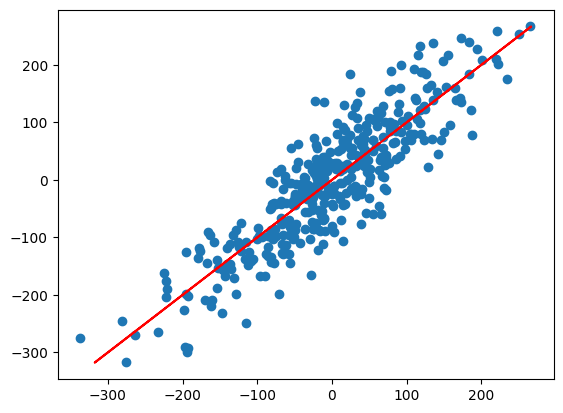

In [ ]:
y_pred1 = binary1.predict(x[[1]])
plt.scatter(y_pred1, y)
plt.plot(y, y, 'r')

In [ ]:
for i in range(5):
  binaryi = LinearRegression().fit(x[[i]], y)
  print(i, binaryi.score(x[[i]], y))

0 0.04364336234689348
1 0.7699743283650629
2 0.18794528514998887
3 0.047470345664983093
4 0.00017176151145947838


In [ ]:
multiple = LinearRegression().fit(x, y)
multiple.score(x, y)

0.9922198026415868

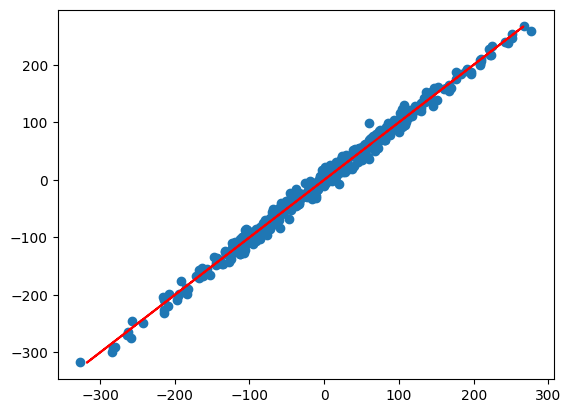

In [ ]:
y_predm = multiple.predict(x)
plt.scatter(y_predm, y)
plt.plot(y, y, 'r')

In [ ]:
multiple.coef_

array([[15.79537523, 93.21521093, 37.19410687, 31.19129121, -0.23773114]])

In [ ]:
multiple.intercept_

array([0.56498354])

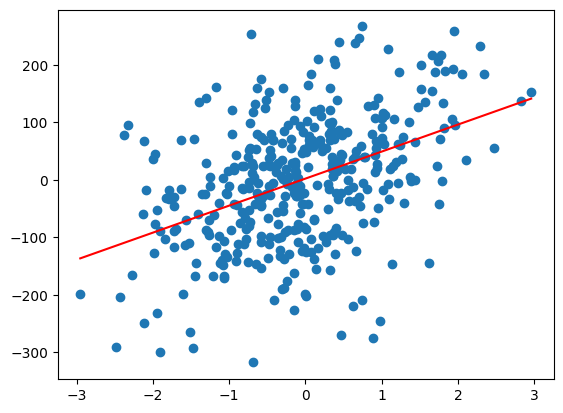

In [ ]:
binary2 = LinearRegression().fit(x[[2]], y)
plt.scatter(x[2], y)
xx = np.linspace(x[2].min(), x[2].max(), 100).reshape((-1, 1))
plt.plot(xx, binary2.predict(xx), c='r')

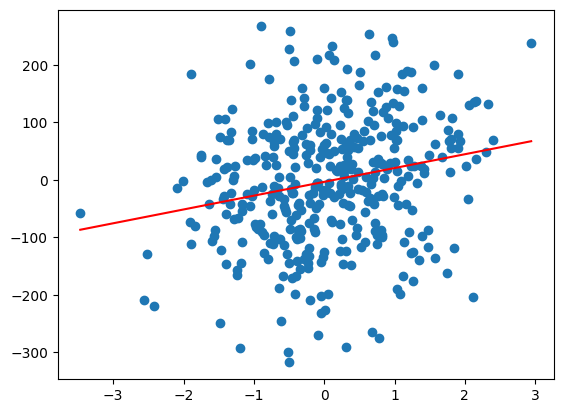

In [ ]:
binary3 = LinearRegression().fit(x[[3]], y)
plt.scatter(x[3], y)
xx = np.linspace(x[3].min(), x[3].max(), 100).reshape((-1, 1))
plt.plot(xx, binary3.predict(xx), c='r')

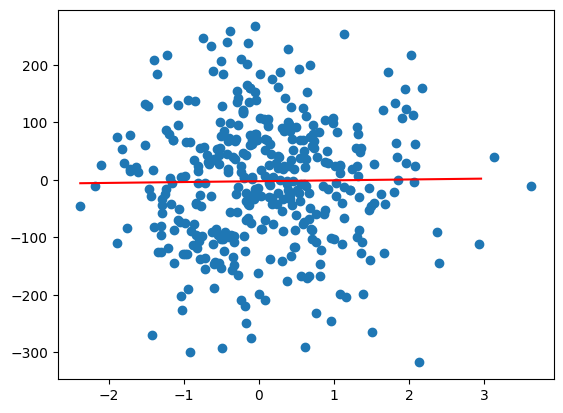

In [ ]:
binary4 = LinearRegression().fit(x[[4]], y)
plt.scatter(x[4], y)
xx = np.linspace(x[4].min(), x[2].max(), 100).reshape((-1, 1))
plt.plot(xx, binary4.predict(xx), c='r')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Model_m(object):
    """Модель многомерной линейной регрессии"""
    def __init__(self):
        self.weights = None

    def predict(self, X):
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        return X_with_bias @ self.weights

    def error(self, X, y):
        y = np.array(y).flatten()
        return sum((self.predict(X) - y)**2) / (2 * len(y))

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).flatten()

        if len(X.shape) == 1:
            X = X.reshape(-1, 1)

        self.weights = np.ones(X.shape[1] + 1)

        alpha = 0.5
        prev_error = float('inf')
        epsilon = 1e-6

        for _ in range(100):
            old_weights = self.weights.copy()

            X_with_bias = np.c_[np.ones(X.shape[0]), X]

            predictions = self.predict(X)
            errors = predictions - y

            gradients = (X_with_bias.T @ errors) / len(y)

            self.weights -= alpha * gradients

            current_error = self.error(X, y)

            if current_error > prev_error:
                self.weights = old_weights
                alpha /= 2
                continue

            if abs(prev_error - current_error) < epsilon:
                break

            prev_error = current_error

    def plot(self, x, y):
        """Визуализация для одномерного случая (первого признака)"""
        if len(np.array(x).shape) > 1 and np.array(x).shape[1] > 1:
            print("Визуализация доступна только для первого признака")
            x = np.array(x)[:, 0]

        plt.scatter(x, y, color='b', label='Данные')

        x_line = np.linspace(min(x), max(x), 2)
        y_line = self.predict(x_line)
        plt.plot(x_line, y_line, 'r-', label='Прогноз')

        plt.legend()
        plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
def fit_poly_regression(x, col, y, degree):
    x_reshaped = x[col].values.reshape(-1, 1)

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly.fit_transform(x_reshaped)

    x_poly_sm = sm.add_constant(x_poly)

    model = sm.OLS(y, x_poly_sm).fit()

    print(f"\n🔹 Полиномиальная регрессия {degree}-й степени для признака '{col}'")
    print(f"R² = {model.rsquared:.4f}")
    print(f"F-статистика = {model.fvalue:.2f}")
    print(f"p-value (F-тест) = {model.f_pvalue:.4f}")

    return model

In [ ]:
degrees = [2, 3, 10]
for col in range(5):
    for degree in degrees:
        model = fit_poly_regression(x, col, y, degree)


🔹 Полиномиальная регрессия 2-й степени для признака '0'
R² = 0.0437
F-статистика = 8.77
p-value (F-тест) = 0.0002

🔹 Полиномиальная регрессия 3-й степени для признака '0'
R² = 0.0438
F-статистика = 5.84
p-value (F-тест) = 0.0007

🔹 Полиномиальная регрессия 10-й степени для признака '0'
R² = 0.0504
F-статистика = 1.99
p-value (F-тест) = 0.0329

🔹 Полиномиальная регрессия 2-й степени для признака '1'
R² = 0.7700
F-статистика = 642.76
p-value (F-тест) = 0.0000

🔹 Полиномиальная регрессия 3-й степени для признака '1'
R² = 0.7711
F-статистика = 430.12
p-value (F-тест) = 0.0000

🔹 Полиномиальная регрессия 10-й степени для признака '1'
R² = 0.7727
F-статистика = 127.80
p-value (F-тест) = 0.0000

🔹 Полиномиальная регрессия 2-й степени для признака '2'
R² = 0.1900
F-статистика = 45.04
p-value (F-тест) = 0.0000

🔹 Полиномиальная регрессия 3-й степени для признака '2'
R² = 0.1928
F-статистика = 30.49
p-value (F-тест) = 0.0000

🔹 Полиномиальная регрессия 10-й степени для признака '2'
R² = 0.2044


1. Признак 0
*   R² низкий (0.04–0.05) → объясняет менее 5% дисперсии.
*   p-value < 0.05 для всех степеней → модель значима, но практически бесполезна из-за низкого R².

Вывод: Связь с y крайне слабая. Усложнение модели (до 10-й степени) не улучшает предсказание.

2. Признак 1
*   R² высокий (0.77–0.77) → объясняет ~77% дисперсии.
*   p-value ≈ 0 → модель очень значима.

Вывод: Сильная связь с y. Даже полином 2-й степени хорошо работает. Усложнение модели не дает прироста.

3. Признак 2

*   R² умеренный (0.19–0.20) → объясняет ~19–20% дисперсии.
*   p-value ≈ 0 → модель значима.

Вывод: Связь есть, но слабее, чем у признака '1'. Полином 2-й степени достаточен.

4. Признак 3

*   R² низкий (0.05–0.07) → объясняет 5–7% дисперсии.
*   p-value < 0.05 → модель значима, но польза минимальна.

Вывод: Слабая связь. Усложнение до 10-й степени немного увеличивает R², но модель остается малополезной.

5. Признак 4

*   R² почти нулевой (0.001–0.045) → почти не объясняет дисперсию.
*   p-value > 0.05 для степеней 2 и 3 → модель незначима.
*   Для степени 10:

  * R² = 0.045 (очень низкий).

  * p-value = 0.0637 (на грани значимости).

Вывод: Нет доказательств связи с y. Возможно, шум.

| Признак | Степень |   R²   | F-статистика | p-value  |       Вывод       |
|---------|---------|--------|--------------|----------|-------------------|
|    0    |    2    | 0.0437 |     8.77     | 0.0002   | Недообученная (низкий R²)     |
|    0    |    3    | 0.0438 |     5.84     | 0.0007   | Недообученная  (низкий R²)   |
|    0    |   10    | 0.0504 |     1.99     | 0.0329   | **Переобученная** (R² почти не растет, F падает)|
|    1    |    2    | 0.7700 |    642.76    | 0.0000   | Оптимальная      (высокий R², значимая) |
|    1    |    3    | 0.7711 |    430.12    | 0.0000   | Незначимое улучшение |
|    1    |   10    | 0.7727 |    127.80    | 0.0000   | **Переобученная**  (F резко упала, R² почти не изменился)|
|    2    |    2    | 0.1900 |     45.04    | 0.0000   | Слабая, но значимая |
|    2    |    3    | 0.1928 |     30.49    | 0.0000   | Незначимое улучшение |
|    2    |   10    | 0.2044 |     9.66     | 0.0000   | **Переобученная** (F упала в 5 раз, R² вырос на 1%)|
|    3    |    2    | 0.0479 |     9.67     | 0.0001   | Недообученная   (низкий R²)   |
|    3    |    3    | 0.0503 |     6.76     | 0.0002   | Недообученная   (низкий R²)   |
|    3    |   10    | 0.0727 |     2.95     | 0.0014   | **Переобученная** (R² вырос незначительно, F упала) |
|    4    |    2    | 0.0010 |     0.20     | 0.8175   | **Незначимая** (p-value > 0.05)    |
|    4    |    3    | 0.0011 |     0.14     | 0.9385   | **Незначимая** (p-value > 0.05)   |
|    4    |   10    | 0.0451 |     1.77     | 0.0637   | На грани значимости (возможно, шум)|

In [ ]:
import time
for degree in degrees:
    start_time = time.time()

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x)

    model = LinearRegression()
    model.fit(X_poly, y)

    elapsed_time = time.time() - start_time
    results[degree] = elapsed_time
    print(f"Степень {degree}: {elapsed_time:.4f} сек")

Степень 2: 0.0063 сек
Степень 3: 0.0121 сек
Степень 10: 0.2327 сек


#Регрессия на реальном датасете#

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
type(california)

sklearn.utils._bunch.Bunch

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(type(california.data), type(california.target))
print(california.data.shape, california.target.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(20640, 8) (20640,)


In [ ]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [ ]:
y = data['Price']
X = data.drop('Price', axis=1)
y.shape, X.shape

((20640,), (20640, 8))

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [ ]:
model.score(X, y)

0.606232685199805

In [ ]:
_ = [print(k, v) for k, v in zip(california.feature_names, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


In [ ]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718441


In [ ]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [ ]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


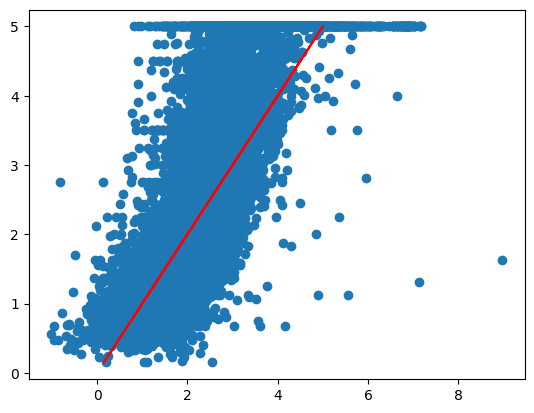

In [ ]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [ ]:
model.score(X, y)

0.606232685199805

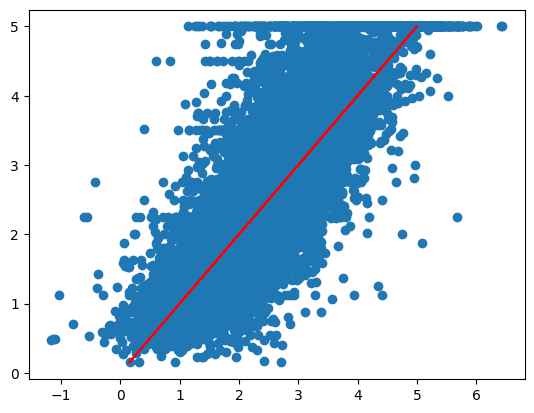

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3).fit_transform(X)
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [ ]:
polynomial.score(poly, y)

0.7286583857949847

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print("Linear Regression Metrics:")
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y, y_pred))
print("MSE (Средняя квадратичная ошибка):", mean_squared_error(y, y_pred))
print("RMSE (Стандартное отклонение ошибок модели):", np.sqrt(mean_squared_error(y, y_pred)))
print("R2 (Коэффициент детерминации):", r2_score(y, y_pred))

print("\nPolynomial Regression Metrics:")
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y, y_pred_poly))
print("MSE (Средняя квадратичная ошибка):", mean_squared_error(y, y_pred_poly))
print("RMSE (Стандартное отклонение ошибок модели):", np.sqrt(mean_squared_error(y, y_pred_poly)))
print("R2 (Коэффициент детерминации):", r2_score(y, y_pred_poly))

Linear Regression Metrics:
MAE (Средняя абсолютная ошибка): 0.5311643817546476
MSE (Средняя квадратичная ошибка): 0.5243209861846072
RMSE (Стандартное отклонение ошибок модели): 0.7241001216576387
R2 (Коэффициент детерминации): 0.606232685199805

Polynomial Regression Metrics:
MAE (Средняя абсолютная ошибка): 0.4284215188192052
MSE (Средняя квадратичная ошибка): 0.36130500781937025
RMSE (Стандартное отклонение ошибок модели): 0.6010865227397552
R2 (Коэффициент детерминации): 0.7286583857949847


* Метод опорных векторов
  * Без ядра - svr linear
  * С гауссовым ядром - svr rbf
  * С полиномиальным ядром - svr poly
* Метод ближайших соседей - knn
* Многослойный перцептрон - mlp
* Дерево решений - Decision Tree
* Другие методы:
  * Гребневая регрессия - Ridge
  * Регрессия Лассо - Lasso
  * Регрессия ElasticNet - ElasticNet
  * Случайный лес - Random Forest
  * Беггинг - Bagging

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from time import time

In [ ]:
def train_and_evaluate_optimized(X, y,random_state=42):
    # Модели, ТРЕБУЮЩИЕ масштабирования
    scale_models = {
        'SVR (linear)': SVR(kernel='linear', C=1.0),
        'SVR (rbf)': SVR(kernel='rbf', C=1.0, gamma='scale'),
        'SVR (poly)': SVR(kernel='poly', degree=2, C=1.0),
        'KNN': KNeighborsRegressor(n_neighbors=5),
        'MLP': MLPRegressor(hidden_layer_sizes=(50,), max_iter=500),
        'Ridge': Ridge(),
        'Lasso': Lasso(alpha=0.1),
        'ElasticNet': ElasticNet(alpha=0.1)
    }

    # Модели, НЕ требующие масштабирования
    no_scale_models = {
        'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=random_state),
        'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=5,
                                             random_state=random_state, n_jobs=-1),
        'Bagging': BaggingRegressor(n_estimators=50, random_state=random_state, n_jobs=-1)
    }

    # Масштабируем данные один раз
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    results = {}
    plt.figure(figsize=(15, 10))

    # Обучение моделей с масштабированием
    for i, (name, model) in enumerate(scale_models.items(), 1):
        start_time = time()
        model.fit(X_scaled, y)
        y_pred = model.predict(X_scaled)
        train_time = time() - start_time

        mse = mean_squared_error(y, y_pred)
        results[name] = {
            'RMSE': np.sqrt(mse),
            'R2': r2_score(y, y_pred),
            'Time (s)': train_time
        }

        plt.subplot(4, 3, i)
        plt.scatter(y, y_pred, alpha=0.5)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
        plt.title(f'{name}\nRMSE: {np.sqrt(mse):.2f}, Time: {train_time:.1f}s')

    # Обучение моделей без масштабирования
    offset = len(scale_models)
    for i, (name, model) in enumerate(no_scale_models.items(), offset + 1):
        start_time = time()
        model.fit(X, y)
        y_pred = model.predict(X)
        train_time = time() - start_time

        mse = mean_squared_error(y, y_pred)
        results[name] = {
            'RMSE': np.sqrt(mse),
            'R2': r2_score(y, y_pred),
            'Time (s)': train_time
        }

        plt.subplot(4, 3, i)
        plt.scatter(y, y_pred, alpha=0.5)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
        plt.title(f'{name}\nRMSE: {np.sqrt(mse):.2f}, Time: {train_time:.1f}s')

    plt.tight_layout()
    plt.show()

    # Вывод результатов в таблице
    print("{:<20} {:<10} {:<10} {:<10}".format('Model', 'RMSE', 'R2', 'Time (s)'))
    print("-" * 50)
    for name, metrics in results.items():
        print("{:<20} {:<10.3f} {:<10.3f} {:<10.1f}".format(
            name, metrics['RMSE'], metrics['R2'], metrics['Time (s)']))

    return results

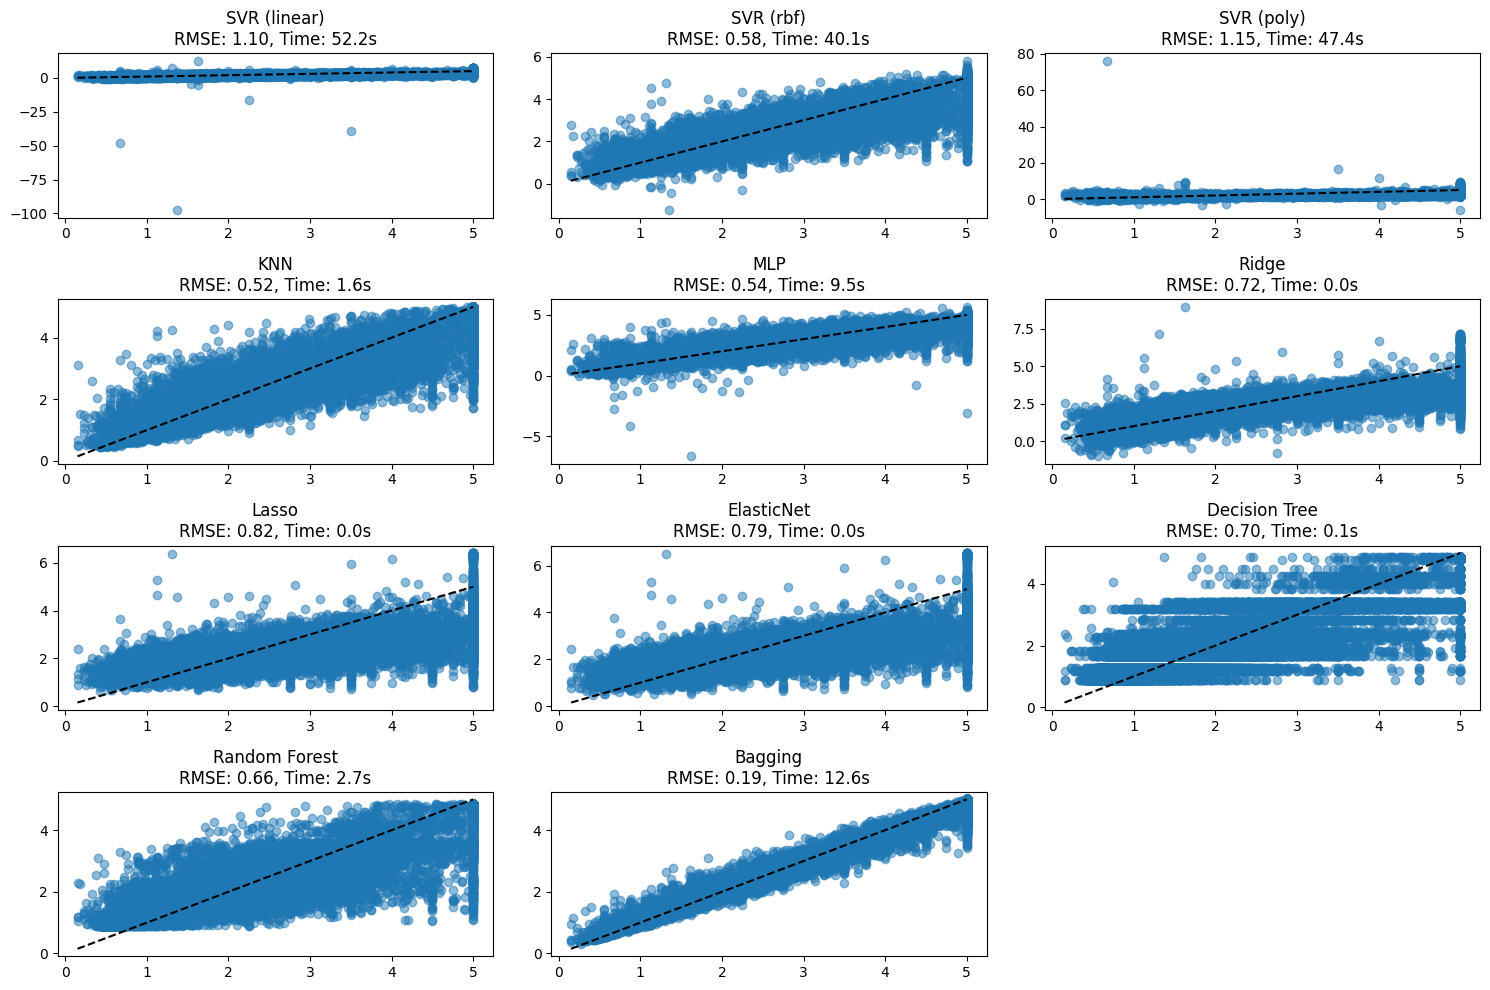

Model                RMSE       R2         Time (s)  
--------------------------------------------------
SVR (linear)         1.103      0.086      52.2      
SVR (rbf)            0.577      0.750      40.1      
SVR (poly)           1.153      0.002      47.4      
KNN                  0.518      0.799      1.6       
MLP                  0.544      0.777      9.5       
Ridge                0.724      0.606      0.0       
Lasso                0.821      0.494      0.0       
ElasticNet           0.793      0.527      0.0       
Decision Tree        0.700      0.632      0.1       
Random Forest        0.657      0.675      2.7       
Bagging              0.191      0.973      12.6      


In [ ]:
results = train_and_evaluate_optimized(X, y)

In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [ ]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
data1 = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data1['Progression'] = diabetes.target
data1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  Progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
data1.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,152.13
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,77.09
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14,25.00
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03,87.00
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,140.50
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,211.50
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14,346.00


In [ ]:
y1 = data1['Progression']
X1 = data1.drop('Progression', axis=1)
y1.shape, X1.shape

((442,), (442, 10))

In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X1, y1)

LinearRegression()

In [ ]:
model1.score(X1, y1)

0.5177484222203499

In [ ]:
_ = [print(k, v) for k, v in zip(X1.columns, model1.coef_)]

age -10.009866299810684
sex -239.81564367242237
bmi 519.84592005446
bp 324.38464550232356
s1 -792.1756385522286
s2 476.7390210052569
s3 101.04326793803338
s4 177.06323767134643
s5 751.2736995571034
s6 67.62669218370515


In [ ]:
print("Intercept: \n", model1.intercept_)

Intercept: 
 152.13348416289597


In [ ]:
y_pred1 = model1.predict(X1)
print(y_pred1[:5])

[206.11667725  68.07103297 176.88279035 166.91445843 128.46225834]


In [ ]:
print(y1[:5])

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Progression, dtype: float64


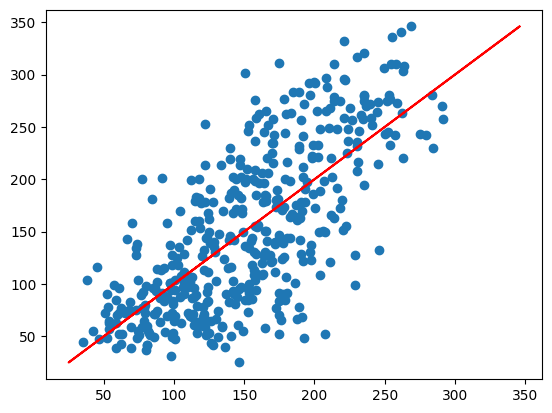

In [ ]:
plt.scatter(y_pred1, y1)
plt.plot(y1, y1, c='r')

In [ ]:
model1.score(X1, y1)

0.5177484222203499

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly1 = PolynomialFeatures(3).fit_transform(X1)
polynomial1 = LinearRegression()
polynomial1.fit(poly1, y1)
y_pred_poly1 = polynomial1.predict(poly1)

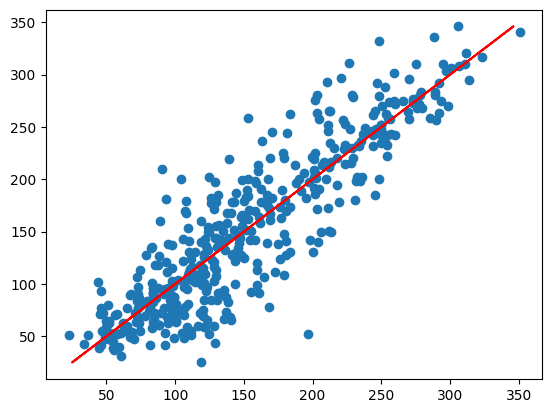

In [ ]:
plt.scatter(y_pred_poly1, y1)
plt.plot(y1, y1, c='r')

In [ ]:
polynomial1.score(poly1, y1)

0.798067172379368

degree > 3 -> score = 1.0 => переобучение

In [ ]:
print("Linear Regression Metrics:")
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y1, y_pred1))
print("MSE (Средняя квадратичная ошибка):", mean_squared_error(y1, y_pred1))
print("RMSE (Стандартное отклонение ошибок модели):", np.sqrt(mean_squared_error(y1, y_pred1)))
print("R2 (Коэффициент детерминации):", r2_score(y1, y_pred1))

print("\nPolynomial Regression Metrics:")
print("MAE (Средняя абсолютная ошибка):", mean_absolute_error(y1, y_pred_poly1))
print("MSE (Средняя квадратичная ошибка):", mean_squared_error(y1, y_pred_poly1))
print("RMSE (Стандартное отклонение ошибок модели):", np.sqrt(mean_squared_error(y1, y_pred_poly1)))
print("R2 (Коэффициент детерминации):", r2_score(y1, y_pred_poly1))

Linear Regression Metrics:
MAE (Средняя абсолютная ошибка): 43.27745202531506
MSE (Средняя квадратичная ошибка): 2859.69634758675
RMSE (Стандартное отклонение ошибок модели): 53.47612876402657
R2 (Коэффициент детерминации): 0.5177484222203499

Polynomial Regression Metrics:
MAE (Средняя абсолютная ошибка): 25.66021040899109
MSE (Средняя квадратичная ошибка): 1197.4384246979935
RMSE (Стандартное отклонение ошибок модели): 34.60402324438581
R2 (Коэффициент детерминации): 0.798067172379368


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


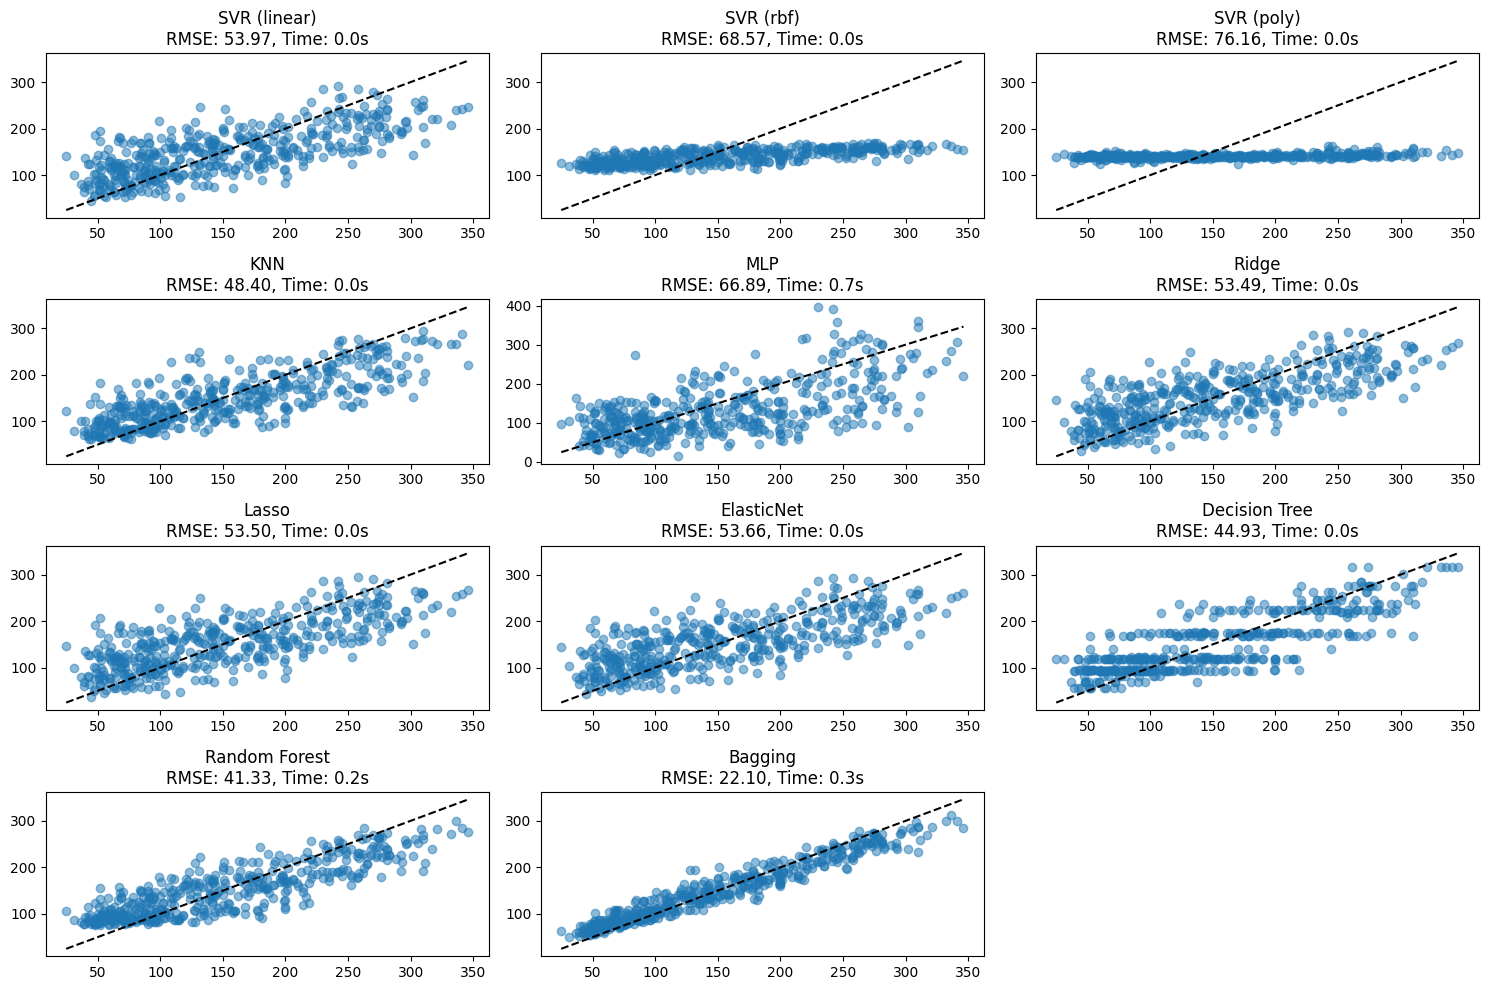

Model                RMSE       R2         Time (s)  
--------------------------------------------------
SVR (linear)         53.971     0.509      0.0       
SVR (rbf)            68.566     0.207      0.0       
SVR (poly)           76.165     0.022      0.0       
KNN                  48.400     0.605      0.0       
MLP                  66.890     0.245      0.7       
Ridge                53.485     0.518      0.0       
Lasso                53.497     0.517      0.0       
ElasticNet           53.664     0.514      0.0       
Decision Tree        44.933     0.660      0.0       
Random Forest        41.326     0.712      0.2       
Bagging              22.097     0.918      0.3       


In [ ]:
results1 = train_and_evaluate_optimized(X1, y1)